## Regressão Linear

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [34]:
#download dos dados da IBM
dsFuel = pd.read_csv('FuelConsumptionCo2.csv')
dsFuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [35]:
dsFuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [36]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [37]:
df_enginesize = dsFuel[['ENGINESIZE', 'CO2EMISSIONS']]
df_enginesize

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


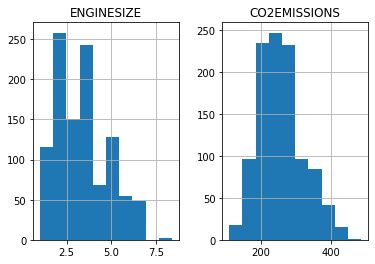

In [38]:
df_enginesize.hist()
plt.show()

In [39]:
ds4train = dsFuel.drop(columns=['MODELYEAR'])
corr = ds4train.corr()
corr.dropna()
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


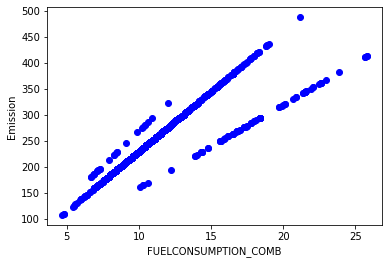

In [40]:
plt.scatter(dsFuel.FUELCONSUMPTION_COMB, dsFuel.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

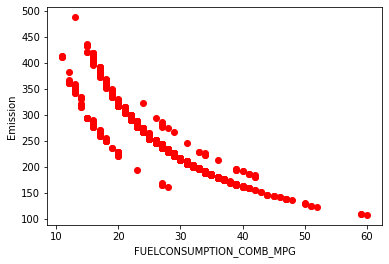

In [41]:
plt.scatter(dsFuel.FUELCONSUMPTION_COMB_MPG, dsFuel.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

<AxesSubplot:>

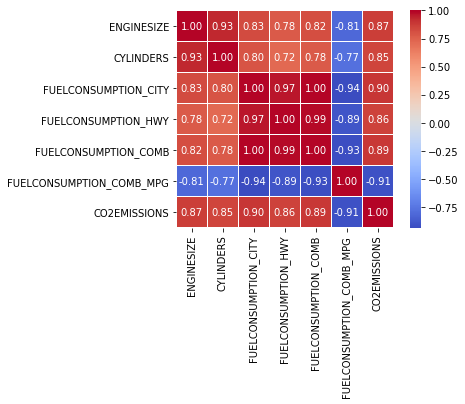

In [42]:
import seaborn as sns
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [78]:
import numpy as np

def test(X_colname, y_colname):
    #target
    X = dsFuel[X_colname]
    y = dsFuel[y_colname]

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score, mean_squared_error

    # Function for comparing different approaches
    def score_dataset(X_train, X_valid, y_train, y_valid):
        model = linear_model.LinearRegression()
        X_train2 = np.asanyarray(X_train).reshape(-1, 1)
        X_valid2 = np.asanyarray(X_valid).reshape(-1, 1)
        y_train2 = np.asanyarray(y_train).reshape(-1, 1)
        y_valid2 = np.asanyarray(y_valid).reshape(-1, 1)
        
        model.fit(X_train2, y_train2)
        preds = model.predict(X_valid2)
        mae = mean_absolute_error(y_valid2, preds)
        f1 = r2_score(y_valid2, preds)
        mse = mean_squared_error(y_valid2, preds)
        
        return {'MAE': mae, 'F1': f1, 'MSE': mse}

    return score_dataset(X_train, X_valid, y_train, y_valid)
    
test('FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS')

{'MAE': 17.28147858848803, 'F1': 0.8261445883060663, 'MSE': 733.9280959256148}

In [79]:
y_colname = 'CO2EMISSIONS'
dsAnalyseX = ds4train.drop(columns=[y_colname]).select_dtypes(exclude=['object'])
dsAnalyseX.head()
for col in dsAnalyseX.columns:
    print(col)
    mae = test(col, y_colname)
    #print(type(mae))
    print(mae)

ENGINESIZE
{'MAE': 25.56889045602356, 'F1': 0.7201153918073576, 'MSE': 1181.528809303555}
CYLINDERS
{'MAE': 28.193216672104604, 'F1': 0.6938815719098186, 'MSE': 1292.2744990618455}
FUELCONSUMPTION_CITY
{'MAE': 19.219810782359914, 'F1': 0.8335942847774922, 'MSE': 702.4793104479282}
FUELCONSUMPTION_HWY
{'MAE': 24.678615452612807, 'F1': 0.7658933264232992, 'MSE': 988.2779230600316}
FUELCONSUMPTION_COMB
{'MAE': 20.34326670225675, 'F1': 0.8232089747544087, 'MSE': 746.3207459061316}
FUELCONSUMPTION_COMB_MPG
{'MAE': 17.28147858848803, 'F1': 0.8261445883060663, 'MSE': 733.9280959256148}
